<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2022/blob/main/esonero2/EsempioSoluzione_MetodiAI_Fis2022_Esonero_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seconda Prova Esonero - Metodi AI e Machine Learning per la fisica 
### 08.06.2021 - AA 2021/22 - Docente: S. Giagu


> **Regole:**

*   **tempo a disposizione:** 1h45'

*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito* usando questo notebook 
*   una volta completato il compito sottomettere il notebook nel apposito folder sul sito e-learning del corso disponibile al link: <p>
[consegna esonero](https://elearning.uniroma1.it/mod/assign/view.php?id=483473) <p>
NOTA BENE: una volta sottomesso il notebook non sono più possibili ulteriori modifiche

In [3]:
#@ Dati Personali
import os

Nome = 'Stefano'  #@param {type: "string"}
Cognome = 'Giagu' #@param {type: "string"}
NumeroMatricola = 123456789 #@param {type: "number"}


if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!') 
else:
  print('Downloading datasets')
  !rm -rf diffr_data.npz
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hbTn7GACjEG-N4wGUCKojqlDBHr4QQ8x' -O- | sed -rn 's/.*confirm=([1-9A-Za-z_]+).*/\1\n/p')&id=1hbTn7GACjEG-N4wGUCKojqlDBHr4QQ8x" -O diffr_data.npz && rm -rf /tmp/cookies.txt
  print('Done')

--2022-06-21 19:15:35--  https://docs.google.com/uc?export=download&confirm=&id=1hbTn7GACjEG-N4wGUCKojqlDBHr4QQ8x
Resolving docs.google.com (docs.google.com)... 108.177.126.101, 108.177.126.138, 108.177.126.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ve1rgtrnkenqikdavql0qbu5087eprm3/1655838900000/03615031767846521878/*/1hbTn7GACjEG-N4wGUCKojqlDBHr4QQ8x?e=download [following]
--2022-06-21 19:15:36--  https://doc-0c-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ve1rgtrnkenqikdavql0qbu5087eprm3/1655838900000/03615031767846521878/*/1hbTn7GACjEG-N4wGUCKojqlDBHr4QQ8x?e=download
Resolving doc-0c-1o-docs.googleusercontent.com (doc-0c-1o-docs.googleusercontent.com)... 173.194.79.132, 2a00:1450:4013:c05::84
Connecting to doc-0c-1o-docs.googleusercontent.com (doc-0c

# Descrizione del compito:

### Dataset:

il dataset fornito è costituito da un file formato *.npz* (numpy compresso): *Ddiffr_datanpz*
*   contiene in formato numpy 2 array: *X*, e *Y* di shape:

```
import numpy as np
fil = np.load('diffr_data.npz')
X = fil['X']
Y = fil['Y']
print(X.shape)
print(Y.shape)

X shape :  (3000, 200, 5)
Y shape :  (3000,)
```

*X* contiene immagini di dimensione (200,5) in scala di grigio di spettri di interferenza da doppia fenditura (includono effetti di rumore e risoluzione sperimentale), ottenuti per diversi valori del rapporto $\frac{\delta}{\lambda}$ tra distanza tra le fedniture e lunghezza d'onda dell'onda sferica che investe le due fenditure.

*Y* contiene i valori corrispondenti di $\frac{\delta}{\lambda}$

**Compiti:**

0.   leggere in numpy i due array e analizzare le caratteristiche che si ritengono più significative del dataset, plottando 9 immagini scelte in modo random da *X* 
1.   addestrare una rete convoluzionale al task di predire il valore del target *Y* a partire dalle immagini e misurarne le prestazioni in modo opportuno
2.   plottare l'andamento di $\hat{Y}$ predetto vs $Y$ vero
3.   provare ad allenare per la stessa task una rete densa che prenda in input solo la prima riga verticale delle immagini (e.g. $X[:,:,0]$, quindi un input piatto di dimensione 200), e confrontarne le prestazioni ottenute rispetto a quelle del punto 2 

* commentare opportunamente i risultati ottenuti in ogni punto

In [ ]:
# codice ...

In [4]:
import numpy as np
fil = np.load('diffr_data.npz')
X = fil['X']
Y = fil['Y']
print(X.shape)
print(Y.shape)


(3000, 200, 5)
(3000,)


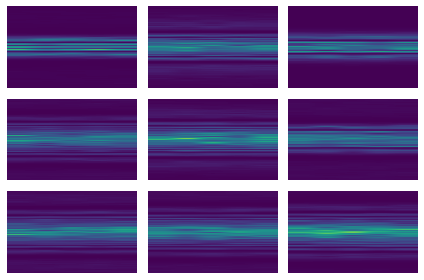

In [5]:
import matplotlib.pyplot as plt

#plot di 9 immagini random del campione

indici = np.random.randint(len(X), size=9)
for idx in range(9):
  plt.subplot(3,3,idx+1)
  plt.imshow(X[indici[idx]], aspect='auto', origin='low')
  plt.axis('off')
plt.tight_layout()
plt.show()

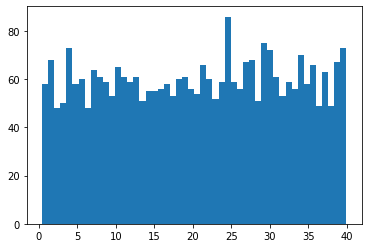

In [6]:
# distribuzione del target

_,_,_ = plt.hist(Y, bins=50)

In [7]:
# statistica del campione

print('X max: ', np.max(X))
print('X min: ', np.min(X))
print('Y max: ', np.max(Y))
print('Y min: ', np.min(Y))

print('X mean: ', np.mean(X))
print('X std: ', np.std(X))
print('Y mean: ', np.mean(Y))
print('Y std: ', np.std(Y))

X max:  21.576121496098107
X min:  0.0
Y max:  39.97479332528447
Y min:  0.40595185638141285
X mean:  1.1685175874251137
X std:  1.7133172821106781
Y mean:  20.475890646005066
Y std:  11.438735190359553


In [8]:
# normalizzo il target tra -1 e 1 (per il target posso applicare la trasformazione all'intero dataset)

Ynorm = 2*(Y-np.min(Y))/(np.max(Y)-np.min(Y))-1
print('Ynorm max: ', np.max(Ynorm))
print('Ynorm min: ', np.min(Ynorm))

Ynorm max:  1.0
Ynorm min:  -1.0


In [9]:
from sklearn.model_selection import train_test_split

# divido il campione in train, validation e test
train_to_test_ratio = 0.6

X_train,X_test,Y_train,Y_test = train_test_split(X,Ynorm,train_size=0.7, shuffle=True, random_state=1234)
X_test, X_vali, Y_test, Y_vali = train_test_split(X_test,Y_test,train_size=0.5, shuffle=True, random_state=1234)


In [10]:
# normalizzo le feature di input in [0,1]

X_train_n = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_vali_n = (X_vali-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test_n = (X_test-np.min(X_train))/(np.max(X_train)-np.min(X_train))
print('X_train_n max: ', np.max(X_train_n))
print('X_train_n min: ', np.min(X_train_n))
print('X_vali_n max: ', np.max(X_vali_n))
print('X_vali_n min: ', np.min(X_vali_n))
print('X_test_n max: ', np.max(X_test_n))
print('X_test_n min: ', np.min(X_test_n))

X_train_n max:  1.0
X_train_n min:  0.0
X_vali_n max:  0.8679199412829782
X_vali_n min:  0.0
X_test_n max:  0.9679203612582316
X_test_n min:  0.0


In [12]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import torch.nn.functional as F

In [13]:
# dataset e dataloaders

X_train_n = X_train_n.reshape((X_train_n.shape[0],200,5,1)) #aggiungo il canale come dimensione dummy richiesta da pytorch
X_vali_n = X_vali_n.reshape((X_vali_n.shape[0],200,5,1))
X_test_n = X_test_n.reshape((X_test_n.shape[0],200,5,1))

X_train_pt=torch.Tensor(X_train_n).float()
Y_train_pt=torch.Tensor(Y_train).float()

X_vali_pt=torch.Tensor(X_vali_n).float()
Y_vali_pt=torch.Tensor(Y_vali).float()

X_test_pt=torch.Tensor(X_test_n).float()
Y_test_pt=torch.Tensor(Y_test).float()

X_train_pt = X_train_pt.permute((0,3,1,2)) #sposto la dimensione channel prima di quelle spaziali come richiesto da pytorch
X_vali_pt = X_vali_pt.permute((0,3,1,2))
X_test_pt = X_test_pt.permute((0,3,1,2))

print(X_train_pt.shape)
print(Y_train_pt.shape)
print(X_vali_pt.shape)
print(Y_vali_pt.shape)
print(X_test_pt.shape)
print(Y_test_pt.shape)

train_dataset = TensorDataset(X_train_pt, Y_train_pt) #creo dataset
vali_dataset = TensorDataset(X_vali_pt, Y_vali_pt)
test_dataset = TensorDataset(X_test_pt, Y_test_pt)

batch_size = 64
dl = dict()
dl['train'] = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dl['vali'] = torch.utils.data.DataLoader(vali_dataset, batch_size=batch_size, shuffle=True)
dl['test'] = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# test it
a,b = next(iter(dl['train']))

print(a.shape)
print(b.shape)

torch.Size([2100, 1, 200, 5])
torch.Size([2100])
torch.Size([450, 1, 200, 5])
torch.Size([450])
torch.Size([450, 1, 200, 5])
torch.Size([450])
torch.Size([64, 1, 200, 5])
torch.Size([64])


In [14]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

In [51]:
# CNN model

from torch import nn
import torch.nn.functional as F

class simpleCNN(nn.Module):
  def __init__(self):
    super(simpleCNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3,2))
    self.pool1 = nn.MaxPool2d(kernel_size=(3,1))

    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,2))
    self.pool2 = nn.MaxPool2d(kernel_size=(3,1))

    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,2))
    self.pool3 = nn.MaxPool2d(kernel_size=(3,1))

    self.flatten = nn.Flatten() 

    self.drop1 = nn.Dropout(p=0.5) 
    self.fc1 = nn.Linear(in_features=1536, out_features=128)

    self.drop2 = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(in_features=128, out_features=128)

    self.fc3 = nn.Linear(in_features=128, out_features=1)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)
    x = F.relu(self.conv2(x))
    x = self.pool2(x)
    x = F.relu(self.conv3(x))
    x = self.pool3(x)

    x = self.flatten(x)

    x = self.drop1(x)
    x = F.relu(self.fc1(x))
    x = self.drop2(x)
    x = F.relu(self.fc2(x))
    x = self.fc3(x) #uscita lineare per compito di regressione

    return x
  

# istanziamento del modello
model=simpleCNN()

from torchsummary import summary
if torch.cuda.is_available():
  summary(model.cuda(), input_size=(1,200,5))
else:
  summary(model, input_size=(1, 200, 5))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 198, 4]             224
         MaxPool2d-2            [-1, 32, 66, 4]               0
            Conv2d-3            [-1, 64, 64, 3]          12,352
         MaxPool2d-4            [-1, 64, 21, 3]               0
            Conv2d-5           [-1, 128, 19, 2]          49,280
         MaxPool2d-6            [-1, 128, 6, 2]               0
           Flatten-7                 [-1, 1536]               0
           Dropout-8                 [-1, 1536]               0
            Linear-9                  [-1, 128]         196,736
          Dropout-10                  [-1, 128]               0
           Linear-11                  [-1, 128]          16,512
           Linear-12                    [-1, 1]             129
Total params: 275,233
Trainable params: 275,233
Non-trainable params: 0
-------------------------------

In [52]:
# test
a,b =next(iter(dl['train']))
a=a.to(device)

pred = model(a)
print(pred.shape)


torch.Size([64, 1])


In [53]:
#loss (usiamo MSE)
loss_func=torch.nn.MSELoss()

#metrica (usiamo MAE)
metric_func=torch.nn.L1Loss()

#ottimizzatore
lr = 1e-3
opt=torch.optim.Adam(model.parameters(), lr=lr)

In [54]:
class SaveBestModel:
    def __init__(self, best_valid_loss=float('inf')):
        self.best_valid_loss = best_valid_loss
        
    def __call__(self, current_valid_loss, epoch, model):
        if current_valid_loss < self.best_valid_loss:
            self.best_valid_loss = current_valid_loss
            print("\nFound new best validation loss: %f in epoch %i" %(self.best_valid_loss, epoch+1))
            print("Saving model...")
            torch.save(model, 'best_model.pt')

save_model=SaveBestModel()

In [55]:
#Training
import time

save_model=SaveBestModel()
model=simpleCNN()
opt=torch.optim.Adam(model.parameters(), lr=lr)
model=model.to(device)

epochs=100

hist_loss = []
hist_metric=[]
hist_vloss = []
hist_vmetric=[]

start_t=time.time()

for epoch in range(epochs):
  t0=time.time()

  # training
  model.train()
  train_loss=0
  train_metric=0
  counter=0
  for xb, yb in dl['train']:
    counter += 1
    xb=xb.to(device)
    yb=yb.to(device)

    pred=model(xb)
    loss=loss_func(pred.view(-1), yb)
    metric=metric_func(pred.view(-1), yb)

    train_metric+=metric.item()
    train_loss+=loss.item()

    #update weights
    opt.zero_grad()
    loss.backward()
    opt.step()

  train_loss /=counter
  train_metric/=counter
  hist_loss.append(train_loss)
  hist_metric.append(train_metric)

  model.eval()
  vali_loss=0
  vali_metric=0
  counter=0

  with torch.no_grad():
    for xb, yb in dl['vali']:
      counter += 1
      xb=xb.to(device)
      yb=yb.to(device)
      
      pred=model(xb)

      vloss=loss_func(pred.view(-1), yb)
      vmetric=metric_func(pred.view(-1), yb)

      vali_loss += vloss.item()
      vali_metric += vmetric.item()


  vali_loss /= counter
  vali_metric /= counter
  hist_vloss.append(vali_loss)
  hist_vmetric.append(vali_metric)

  elapsed_time = time.time()-t0
  print("epoch: %d, time [s]: %.4f, train loss: %.6f, train mae: %.6f, vali loss: %.6f, vali mae: %.6f"  %(epoch+1, elapsed_time, train_loss, train_metric ,vali_loss, vali_metric))
  save_model(vali_loss, epoch, model)

epoch: 1, time [s]: 0.6353, train loss: 0.306021, train mae: 0.477243, vali loss: 0.130485, vali mae: 0.292940

Found new best validation loss: 0.130485 in epoch 1
Saving model...
epoch: 2, time [s]: 0.6355, train loss: 0.081730, train mae: 0.223880, vali loss: 0.034206, vali mae: 0.150142

Found new best validation loss: 0.034206 in epoch 2
Saving model...
epoch: 3, time [s]: 0.6316, train loss: 0.038156, train mae: 0.153428, vali loss: 0.021823, vali mae: 0.118814

Found new best validation loss: 0.021823 in epoch 3
Saving model...
epoch: 4, time [s]: 0.6312, train loss: 0.029659, train mae: 0.134767, vali loss: 0.019725, vali mae: 0.112689

Found new best validation loss: 0.019725 in epoch 4
Saving model...
epoch: 5, time [s]: 0.6305, train loss: 0.024087, train mae: 0.119606, vali loss: 0.014137, vali mae: 0.093195

Found new best validation loss: 0.014137 in epoch 5
Saving model...
epoch: 6, time [s]: 0.6305, train loss: 0.021782, train mae: 0.114593, vali loss: 0.013557, vali mae

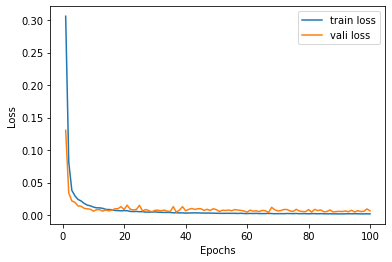

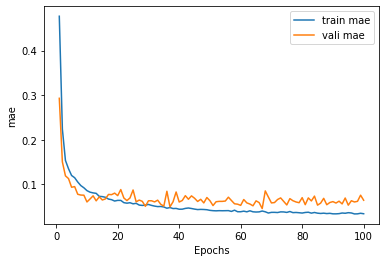

In [56]:
# monitor training loss e metric
plt.plot(range(1, len(hist_loss)+1), hist_loss, label="train loss")
plt.plot(range(1, len(hist_vloss)+1), hist_vloss, label="vali loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(range(1, len(hist_loss)+1), hist_metric, label="train mae")
plt.plot(range(1, len(hist_vloss)+1), hist_vmetric, label="vali mae")
plt.xlabel("Epochs")
plt.ylabel("mae")
plt.legend()

plt.show()

In [57]:
# load best model

model=torch.load('./best_model.pt')
model.eval()
model.to("cpu")

counter=0
test_loss=0
test_metric=0
yhat=[]
y=[]

with torch.no_grad():
    for xb, yb in dl['test']:
      counter+=1
      xb=xb.to("cpu")
      yb=yb.to("cpu")
      pred = model(xb)
      

      tloss=loss_func(pred.view(-1), yb)
      tmetric=metric_func(pred.view(-1), yb)

      test_loss += tloss.item()
      test_metric += tmetric.item()

      yhat.append(pred.item())
      y.append(yb.item())

test_loss/=counter
test_metric/=counter

print("Test loss:", test_loss, "Test metric: ", test_metric)

Test loss: 0.004252610467615219 Test metric:  0.046752634583454994


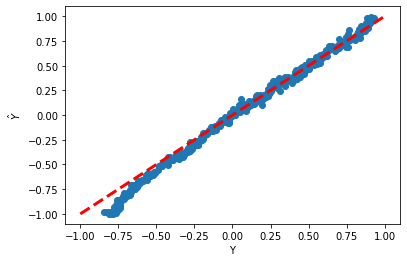

In [58]:
# plot yhat vs y

plt.scatter(yhat, y)
plt.plot([-1,1], [-1,1], 'r--', linewidth=3)
plt.xlabel("Y")
plt.ylabel("$\hat{Y}$")
plt.show()

In [ ]:
# si nota un effetto di non linearità a bassi valori di Y che può essere minimizzato giocando con diverse normalizzazioni 
# del target: non normalizzandolo, normalizzandolo in [0,1], sottraendo media e dividendo per la varianza etc... 

In [43]:
# Dense MLP

class MLP(torch.nn.Module):
  def __init__(self):
    super(MLP, self).__init__()

    self.layer1=torch.nn.Linear(200, 1024)
    self.layer2=torch.nn.Linear(1024, 1)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    out = self.layer2(x)

    return out


model=MLP()

if torch.cuda.is_available():
  summary(model.cuda(), input_size=(1, 200))
else:
  summary(model, input_size=(1, 200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1024]         205,824
            Linear-2                 [-1, 1, 1]           1,025
Total params: 206,849
Trainable params: 206,849
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.79
Estimated Total Size (MB): 0.80
----------------------------------------------------------------


In [44]:
# test
# test
a,b =next(iter(dl['train']))
a=a.to(device)

pred = model(a[:,:,:,0].squeeze()) #uso solo la prima riga della matrice delle feature ed elimino la dimensione channel non necessaria per un MLP
print(pred.shape)

torch.Size([64, 1])


In [45]:
#Training
import time

save_model=SaveBestModel()
model=MLP()
model=model.to(device)

loss_func=torch.nn.MSELoss()
metric_func=torch.nn.L1Loss()
lr = 1e-3
opt=torch.optim.Adam(model.parameters(), lr=lr)

epochs=100

hist_loss = []
hist_metric=[]
hist_vloss = []
hist_vmetric=[]

start_t=time.time()

for epoch in range(epochs):
  t0=time.time()

  # training
  model.train()
  train_loss=0
  train_metric=0
  counter=0
  for xb, yb in dl['train']:
    counter += 1
    xb=xb.to(device)
    yb=yb.to(device)

    pred=model(xb[:,:,:,0].squeeze())
    loss=loss_func(pred.view(-1), yb)
    metric=metric_func(pred.view(-1), yb)

    train_metric+=metric.item()
    train_loss+=loss.item()

    #update weights
    opt.zero_grad()
    loss.backward()
    opt.step()

  train_loss /=counter
  train_metric/=counter
  hist_loss.append(train_loss)
  hist_metric.append(train_metric)

  model.eval()
  vali_loss=0
  vali_metric=0
  counter=0

  with torch.no_grad():
    for xb, yb in dl['vali']:
      counter += 1
      xb=xb.to(device)
      yb=yb.to(device)
      
      pred=model(xb[:,:,:,0].squeeze())

      vloss=loss_func(pred.view(-1), yb)
      vmetric=metric_func(pred.view(-1), yb)

      vali_loss += vloss.item()
      vali_metric += vmetric.item()


  vali_loss /= counter
  vali_metric /= counter
  hist_vloss.append(vali_loss)
  hist_vmetric.append(vali_metric)

  elapsed_time = time.time()-t0
  print("epoch: %d, time [s]: %.4f, train loss: %.6f, train mae: %.6f, vali loss: %.6f, vali mae: %.6f"  %(epoch+1, elapsed_time, train_loss, train_metric ,vali_loss, vali_metric))
  save_model(vali_loss, epoch, model)

epoch: 1, time [s]: 0.0636, train loss: 0.315743, train mae: 0.486299, vali loss: 0.296066, vali mae: 0.488090

Found new best validation loss: 0.296066 in epoch 1
Saving model...
epoch: 2, time [s]: 0.0644, train loss: 0.247671, train mae: 0.434440, vali loss: 0.237182, vali mae: 0.431090

Found new best validation loss: 0.237182 in epoch 2
Saving model...
epoch: 3, time [s]: 0.0628, train loss: 0.183075, train mae: 0.364735, vali loss: 0.151066, vali mae: 0.321800

Found new best validation loss: 0.151066 in epoch 3
Saving model...
epoch: 4, time [s]: 0.0663, train loss: 0.125000, train mae: 0.294590, vali loss: 0.115676, vali mae: 0.278560

Found new best validation loss: 0.115676 in epoch 4
Saving model...
epoch: 5, time [s]: 0.0664, train loss: 0.082693, train mae: 0.230922, vali loss: 0.069469, vali mae: 0.207859

Found new best validation loss: 0.069469 in epoch 5
Saving model...
epoch: 6, time [s]: 0.0646, train loss: 0.053008, train mae: 0.181401, vali loss: 0.072922, vali mae

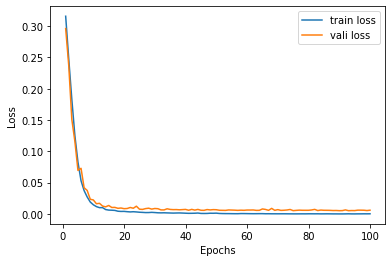

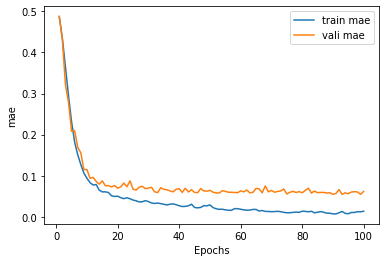

In [46]:
# monitor training loss e metric
plt.plot(range(1, len(hist_loss)+1), hist_loss, label="train loss")
plt.plot(range(1, len(hist_vloss)+1), hist_vloss, label="vali loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(range(1, len(hist_loss)+1), hist_metric, label="train mae")
plt.plot(range(1, len(hist_vloss)+1), hist_vmetric, label="vali mae")
plt.xlabel("Epochs")
plt.ylabel("mae")
plt.legend()

plt.show()

In [47]:
# load best model

model=torch.load('./best_model.pt')
model.eval()
model.to("cpu")

counter=0
test_loss=0
test_metric=0
yhat=[]
y=[]

with torch.no_grad():
    for xb, yb in dl['test']:
      counter+=1
      xb=xb.to("cpu")
      yb=yb.to("cpu")
      pred = model(xb[:,:,:,0].squeeze())
      

      tloss=loss_func(pred.view(-1), yb)
      tmetric=metric_func(pred.view(-1), yb)

      test_loss += tloss.item()
      test_metric += tmetric.item()

      yhat.append(pred.item())
      y.append(yb.item())

test_loss/=counter
test_metric/=counter

print("Test loss:", test_loss, "Test metric: ", test_metric)

Test loss: 0.007251267807100766 Test metric:  0.0638476759267764


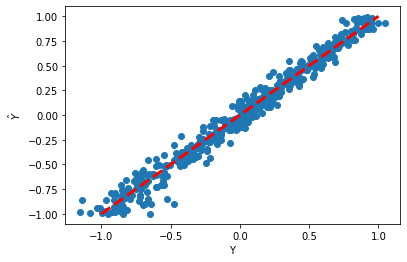

In [50]:
# plot yhat vs y

plt.scatter(yhat, y)
plt.plot([-1,1], [-1,1], 'r--', linewidth=3)
plt.xlabel("Y")
plt.ylabel("$\hat{Y}$")
plt.show()

In [ ]:
# si ottiene una buona linearità ma minore risoluzione (MAE piu' alto) rispetto alla CNN. Usando una rete piu' espressiva (piu' neuroni e deep con 2-3 layer hidden si possono riottenere le stesse prestazioni della CNN)